# Installing Libraries

In [45]:
from keras import layers
import tensorflow as tf
from tensorflow.keras.models import Sequential 
# from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
# from tensorflow.keras.layers import Conv2D, MaxPooling2D 
# from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import matplotlib.pyplot as plt

### Define paths to train and test datasets

In [46]:
train_path = 'dataset/train'
test_path = 'dataset/test'

### Define the CNN model

In [47]:
model = Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.6)) # For regularization
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model

In [48]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0005), loss='binary_crossentropy', metrics=['accuracy'])

### Image Data Augmentation for train set

In [49]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

### Image Data Augmentation for test set

In [50]:
test_datagen = ImageDataGenerator(rescale=1./255)

### Generate batches of augmented data for training and testing

In [51]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(150, 150),
                                                    batch_size=16,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(150, 150),
                                                  batch_size=16,
                                                  class_mode='binary')

Found 338 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


### Train the model

In [52]:
history = model.fit(train_generator, epochs=15, validation_data=test_generator)

Epoch 1/15
22/22 [==============================] - 5s 164ms/step - loss: 0.7025 - accuracy: 0.5266 - val_loss: 0.6881 - val_accuracy: 0.4839
Epoch 2/15
22/22 [==============================] - 3s 152ms/step - loss: 0.6928 - accuracy: 0.4882 - val_loss: 0.6887 - val_accuracy: 0.4839
Epoch 3/15
22/22 [==============================] - 4s 167ms/step - loss: 0.6673 - accuracy: 0.5799 - val_loss: 0.6767 - val_accuracy: 0.5323
Epoch 4/15
22/22 [==============================] - 3s 146ms/step - loss: 0.6729 - accuracy: 0.5828 - val_loss: 0.6707 - val_accuracy: 0.5806
Epoch 5/15
22/22 [==============================] - 3s 144ms/step - loss: 0.6650 - accuracy: 0.6154 - val_loss: 0.6811 - val_accuracy: 0.5968
Epoch 6/15
22/22 [==============================] - 3s 144ms/step - loss: 0.6203 - accuracy: 0.6509 - val_loss: 0.6561 - val_accuracy: 0.6129
Epoch 7/15
22/22 [==============================] - 3s 145ms/step - loss: 0.6129 - accuracy: 0.6746 - val_loss: 0.6713 - val_accuracy: 0.5645
Epoch 

### Plot training history

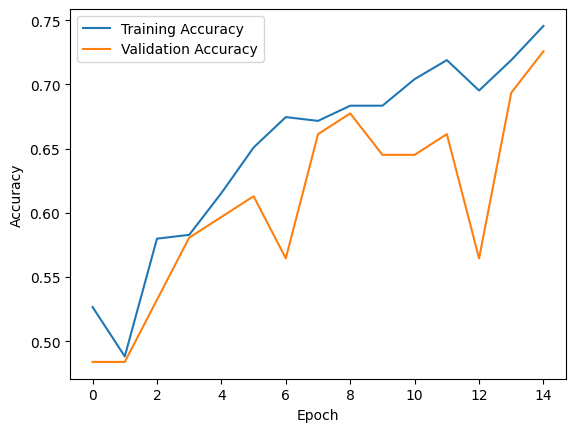

In [53]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Save the model

In [55]:
model.save('cat_dog_classifier.h5')